Figure set up
done with rho plot in  21.12316393852234  seconds
done with mag plot in  26.755155324935913  seconds
done with beta plot in  26.57482624053955  seconds
done with betabar plot in  27.570611238479614  seconds
done with stress plot in  26.82418441772461  seconds
done with alpha plot in  25.932066679000854  seconds
done
Run time is  154.83994913101196  seconds


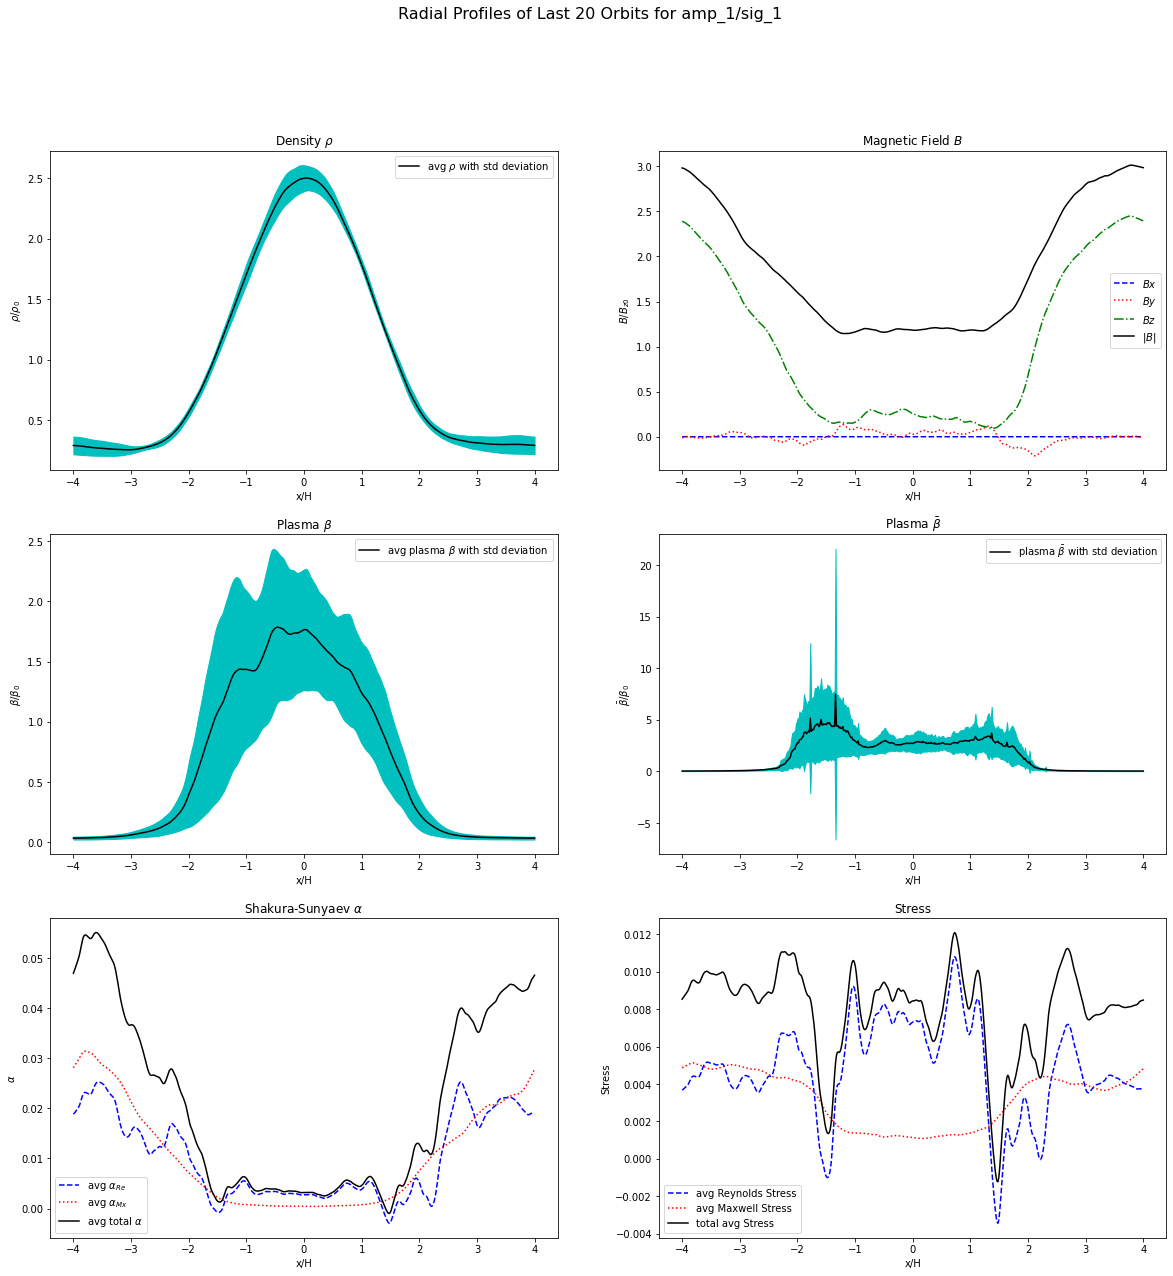

In [2]:
#see complete_profiles and oned_profiles for development
import time
import complete_profiles as cmp
import numpy as np
from matplotlib import pylab as plt

start=time.time()
x_arr = np.linspace(-4,4,512)

file_path = './ad_prof/amp_1/sig_1'


def complete_profiles(file_path):
    #figure setup---------------------------------------------------------------
    fig,ax = plt.subplots(3,2)
    fig.set_size_inches(20,20)
    x_arr = np.linspace(-4,4,512)
    sptitle = 'Radial Profiles of Last 20 Orbits for '+file_path[10:]
    fig.suptitle(sptitle,fontsize=16)

    print('Figure set up')
    #rho plot -----------------------------------------------------------------
    rho_time = time.time()
    prof_rho,err_rho = cmp.avg_rho_prof(file_path)
    ax[0,0].plot(x_arr,prof_rho,'k',label='avg $\\rho$ with std deviation')
    ax[0,0].fill_between(x_arr,prof_rho-err_rho,prof_rho+err_rho,color ='c')
    ax[0,0].legend()
    ax[0,0].set_xlabel('x/H')
    ax[0,0].set_ylabel('$\\rho/\\rho_0$')
    subtitle = 'Density $\\rho$'
    ax[0,0].set_title(subtitle)
    print('done with rho plot in ',(time.time()-rho_time),' seconds')
    
    #magnetic plot------------------------------------------------------------------------
    mag_time = time.time()
    #Bz0 as set by initial plasma beta
    Bz0 = np.sqrt(2)/20
    prof_bx,prof_by,prof_bz,prof_bmag = cmp.avg_mag_prof(file_path)
    ax[0,1].plot(x_arr,prof_bx/Bz0,'b--',label ='$Bx$')
    ax[0,1].plot(x_arr,prof_by/Bz0,'r:',label ='$By$')
    ax[0,1].plot(x_arr,prof_bz/Bz0,'g-.',label ='$Bz$')
    ax[0,1].plot(x_arr,prof_bmag/Bz0,'k',label ='$|B|$')
    ax[0,1].legend()
    ax[0,1].set_xlabel('x/H')
    ax[0,1].set_ylabel('$B/B_{z0}$')
    subtitle = 'Magnetic Field $B$'
    ax[0,1].set_title(subtitle)
    print('done with mag plot in ',(time.time()-mag_time),' seconds')
    
    
    
    #Beta plot-------------------------------------------------------------------
    beta_time = time.time()
    prof_beta,err_beta = cmp.avg_beta_prof(file_path)
    #initial plasma beta
    beta0 = 400
    ax[1,0].plot(x_arr,prof_beta/beta0,'k',label='avg plasma $\\beta$ with std deviation')
    ax[1,0].fill_between(x_arr,(prof_beta-err_beta)/beta0,(prof_beta+err_beta)/beta0,color ='c')
    ax[1,0].legend()
    ax[1,0].set_xlabel('x/H')
    ax[1,0].set_ylabel('$\\beta/\\beta_0$')
    subtitle = 'Plasma $\\beta$'
    ax[1,0].set_title(subtitle)
    print('done with beta plot in ',(time.time()-beta_time),' seconds')
    
    #betabar plot--------------------------------------------------------------------
    
    betabar_time = time.time()
    prof_betabar,err_betabar = cmp.avg_betabar_prof(file_path)
    #initial plasma beta
    beta0 = 400
    ax[1,1].plot(x_arr,prof_betabar/beta0,'k',label='plasma $\\bar{\\beta}$ with std deviation')
    ax[1,1].fill_between(x_arr,(prof_betabar-err_betabar)/beta0,(prof_betabar+err_betabar)/beta0,color ='c')
    ax[1,1].legend()
    ax[1,1].set_xlabel('x/H')
    ax[1,1].set_ylabel('$\\bar{\\beta}/\\beta_0$')
    subtitle = 'Plasma $\\bar{\\beta}$'
    ax[1,1].set_title(subtitle)
    print('done with betabar plot in ',(time.time()-betabar_time),' seconds')
    
    #stress plot-----------------------------------------------------------------
    stress_time = time.time()
    prof_avg_reyn,prof_avg_maxw,prof_avg_tot = cmp.avg_stress_prof(file_path)
    ax[2,1].plot(x_arr,prof_avg_reyn,'b--',label='avg Reynolds Stress')
    ax[2,1].plot(x_arr,prof_avg_maxw,'r:',label='avg Maxwell Stress')
    ax[2,1].plot(x_arr,(prof_avg_tot),'k',label='total avg Stress')
    ax[2,1].legend()
    ax[2,1].set_xlabel('x/H')
    ax[2,1].set_ylabel('Stress')
    subtitle = 'Stress'
    ax[2,1].set_title(subtitle)   
    print('done with stress plot in ',(time.time()-stress_time),' seconds')


    #Alpha plot-----------------------------------------------------------------
    alpha_time = time.time()
    prof_avg_reyn,prof_avg_maxw,prof_avg_tot = cmp.avg_alpha_prof(file_path)
    ax[2,0].plot(x_arr,prof_avg_reyn,'b--',label='avg $\\alpha_{Re}$')
    ax[2,0].plot(x_arr,prof_avg_maxw,'r:',label='avg $\\alpha_{Mx}$')
    ax[2,0].plot(x_arr,(prof_avg_tot),'k',label='avg total $\\alpha$')
    ax[2,0].legend()
    ax[2,0].set_xlabel('x/H')
    ax[2,0].set_ylabel('$\\alpha$')
    subtitle = 'Shakura-Sunyaev $\\alpha$'
    ax[2,0].set_title(subtitle)
    print('done with alpha plot in ',(time.time()-alpha_time),' seconds')
    
    ans = 'done'

    return ans
    
print(complete_profiles(file_path))    
print('Run time is ',(time.time()-start),' seconds' )